**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).**

---


## Recap
So far, you have loaded your data and reviewed it with the following code. Run this cell to set up your coding environment where the previous step left off.

In [3]:
# Code you have previously used to load data
import pandas as pd

# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
display(home_data)

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex3 import *

print("Setup Complete")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Setup Complete


In [4]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Exercises

## Step 1: Specify Prediction Target
Select the target variable, which corresponds to the sales price. Save this to a new variable called `y`. You'll need to print a list of the columns to find the name of the column you need.


In [2]:
# print the list of columns in the dataset to find the name of the prediction target
MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour

NameError: name 'MSSubClass' is not defined

In [5]:
y = home_data.SalePrice


# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [12]:
# The lines below will show you a hint or the solution.
step_1.hint() 
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `print(home_data.columns)`. The column you want is at the end of the list. Use the dot notation to pull out this column from the DataFrame

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
y = home_data.SalePrice
```

## Step 2: Create X
Now you will create a DataFrame called `X` holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

You'll use just the following columns in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):
  * LotArea
  * YearBuilt
  * 1stFlrSF
  * 2ndFlrSF
  * FullBath
  * BedroomAbvGr
  * TotRmsAbvGrd

After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

AttributeError: 'DataFrame' object has no attribute 'show'

In [6]:
# Create the list of features below
feature_names = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF",
                      "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]


# Select data corresponding to features in feature_names
X = home_data[feature_names]

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [7]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [25]:
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Capitalization and spelling are important when specifying variable names. Use the brackets notation when specifying data for X.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
feature_names = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF",
                      "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]

X=home_data[feature_names]
```

## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible

In [8]:
# Review data
# print description or statistics from X
#print(_)
X.describe()

# print the top few lines
#print(_)
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


## Step 3: Specify and Fit Model
Create a `DecisionTreeRegressor` and save it iowa_model. Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

In [9]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit the model
iowa_model .fit(X, y)

# Check your answer
step_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [34]:
 step_3.hint()
# step_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Include `random_state` when specifying model. Data is specified when fitting it.

## Step 4: Make Predictions
Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [11]:
predictions = iowa_model.predict(X)
print(predictions)

# Check your answer
step_4.check()

[208500. 181500. 223500. ... 266500. 142125. 147500.]


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [13]:
step_4.hint()
step_4.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `iowa_model.predict` with an argument holding the data to predict with.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
iowa_model.predict(X)
```

## Think About Your Results

Use the `head` method to compare the top few predictions to the actual home values (in `y`) for those same homes. Anything surprising?


TypeError: 'function' object is not subscriptable

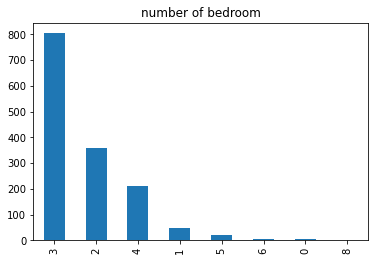

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
home_data['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title('number of bedroom')
plt.xlabel['bedrooms']
sns.despine

It's natural to ask how accurate the model's predictions will be and how you can improve that. That will be you're next step.

# Keep Going

You are ready for **[Model Validation](https://www.kaggle.com/dansbecker/model-validation).**


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*